# Bayes Error: The Quest for the 0% Error Rate

This lab introduces the concept of "irreducible error", which is also known as the "Bayes Error Rate". Run the cells below and fill in "your code" where indicated. This notebook introduces a number of new tools in numpy that we will use in this course. Be sure to read the code carefully.

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set random seed for reproducible results
# np.random.seed(42)

## Part 1: Well Separated Groups

In [132]:
# Create two 2D normal distributions that are far apart
mean_A = [-3, 0]  # Center of group A
mean_B = [3, 0]   # Center of group B
cov = [[1, 0], [0, 1]]  # Same circular variance for both

# Generate labeled data
n_samples = 500
X_A = np.random.multivariate_normal(mean_A, cov, n_samples)
X_B = np.random.multivariate_normal(mean_B, cov, n_samples)

# Combine data and create labels
X_combined = np.vstack([X_A, X_B])
y_combined = np.hstack([np.zeros(n_samples), np.ones(n_samples)])  # 0=A, 1=B

Define a decision boundary -- an $x$ coordinate that separates the 'blue' from the 'red' points

In [133]:
split_point = 2

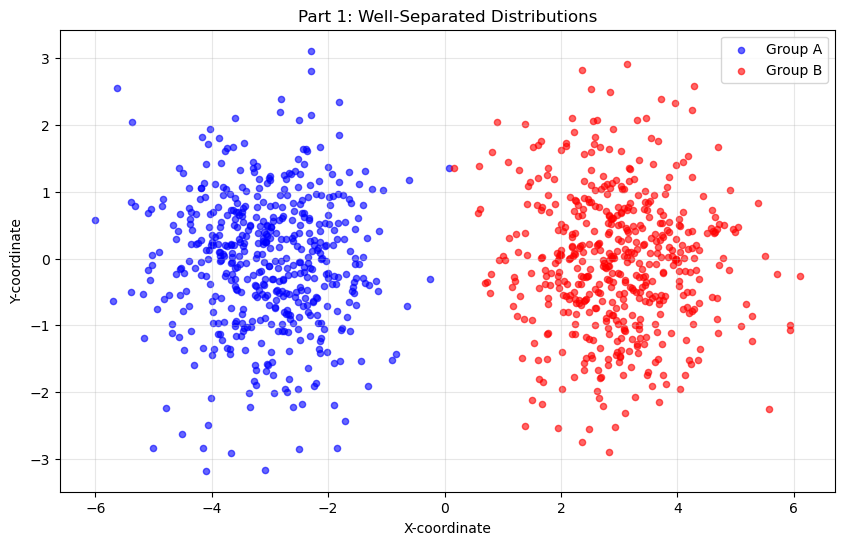

In [134]:
# Visualize the data

plt.figure(figsize=(10, 6))
plt.scatter(X_A[:, 0], X_A[:, 1], c='blue', alpha=0.6, label='Group A', s=20)
plt.scatter(X_B[:, 0], X_B[:, 1], c='red', alpha=0.6, label='Group B', s=20)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Part 1: Well-Separated Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

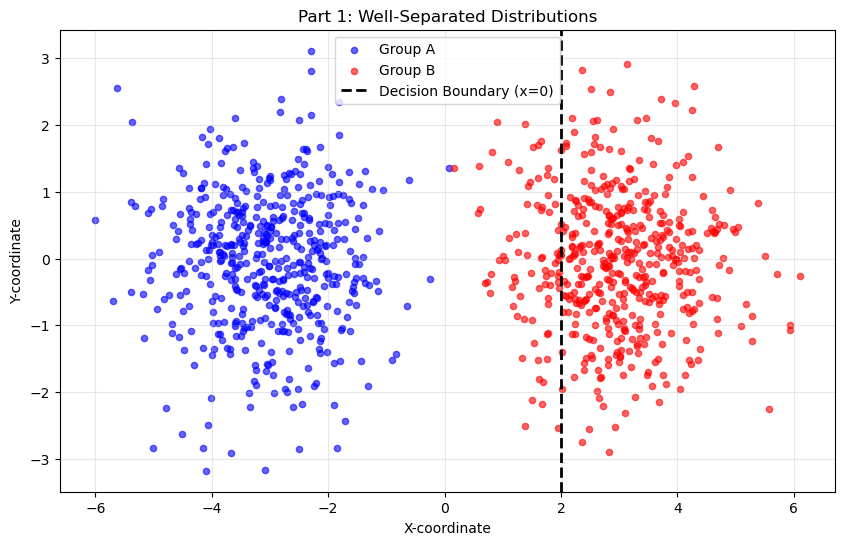

In [135]:
# Visualize the data

plt.figure(figsize=(10, 6))
plt.scatter(X_A[:, 0], X_A[:, 1], c='blue', alpha=0.6, label='Group A', s=20)
plt.scatter(X_B[:, 0], X_B[:, 1], c='red', alpha=0.6, label='Group B', s=20)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Part 1: Well-Separated Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

# Draw a decision boundary at x = 0
plt.axvline(x=split_point, color='black', linestyle='--', linewidth=2, label='Decision Boundary (x=0)')
plt.legend()
plt.show()

In [136]:
# TODO 1: Count classification errors with decision boundary at x = 0
# INSTRUCTIONS: 
# - If x-coordinate > 0, predict Group B (label = 1)
# - If x-coordinate <= 0, predict Group A (label = 0)
# - Count how many predictions are wrong

# YOUR CODE HERE:
predictions = (X_combined[:, 0] > split_point)
errors = np.sum(predictions != y_combined)
error_rate = errors / len(y_combined)

print(f"Decision rule: If x > 0, predict Group B; else predict Group A")
print(f"Number of errors: {errors} out of {len(y_combined)} samples")
print(f"Error rate: {error_rate:.3f} ({error_rate*100:.1f}%)")
print()

Decision rule: If x > 0, predict Group B; else predict Group A
Number of errors: 79 out of 1000 samples
Error rate: 0.079 (7.9%)



**ToDo:** Try different split points above and observe how the error rate changes.

## Part 2: Overlapping distributions

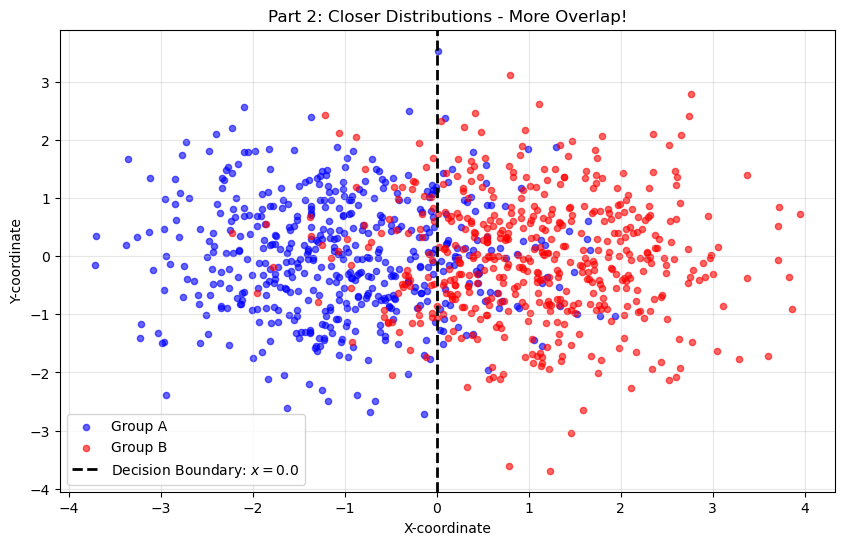

In [137]:
# Create distributions that are closer together
mean_A_close = [-1, 0]  # Closer to center
mean_B_close = [1, 0]   # Closer to center
split_point_close = 0.0  # change this

# Generate new data
X_A_close = np.random.multivariate_normal(mean_A_close, cov, n_samples)
X_B_close = np.random.multivariate_normal(mean_B_close, cov, n_samples)

X_combined_close = np.vstack([X_A_close, X_B_close])
y_combined_close = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

# %%# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_A_close[:, 0], X_A_close[:, 1], c='blue', alpha=0.6, label='Group A', s=20)
plt.scatter(X_B_close[:, 0], X_B_close[:, 1], c='red', alpha=0.6, label='Group B', s=20)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Part 2: Closer Distributions - More Overlap!')
plt.axvline(x=split_point_close, color='black', linestyle='--', linewidth=2, label=f"Decision Boundary: $x={split_point_close}$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [138]:
# Count errors with a decision boundary

# YOUR CODE HERE:
predictions_close = (X_combined_close[:, 0] > split_point_close).astype(int)
errors_close = np.sum(predictions_close != y_combined_close)
error_rate_close = errors_close / len(y_combined_close)

print(f"Same decision rule on closer distributions:")
print(f"Number of errors: {errors_close} out of {len(y_combined_close)} samples")
print(f"Error rate: {error_rate_close:.3f} ({error_rate_close*100:.1f}%)")
print(f"Error increased by: {error_rate_close - error_rate:.3f}")
print()

Same decision rule on closer distributions:
Number of errors: 156 out of 1000 samples
Error rate: 0.156 (15.6%)
Error increased by: 0.077



## Part 3: Finding the Optimal Split Point

In [204]:
# TODO 3: Try different split points and find the best one
# INSTRUCTIONS: Test split points from -2 to 2 and find the one with lowest error

split_points = np.linspace(-2, 2, 410)  # Test 41 different points
error_rates = []

for split in split_points:
    # YOUR CODE HERE: 
    # 1. Make predictions using this split point
    # 2. Calculate error rate
    # 3. Store in error_rates list
    
    predictions = (X_combined_close[:, 0] > split)
    errors = np.sum(predictions != y_combined_close)
    error_rate = errors / len(y_combined_close)
    error_rates.append(error_rate)

# Find the best split point
best_idx = np.argmin(error_rates)
best_split = split_points[best_idx]
best_error_rate = error_rates[best_idx]

print(f"Best split point: x = {best_split:.2f}")
print(f"Best error rate: {best_error_rate:.3f} ({best_error_rate*100:.1f}%)")
print()

Best split point: x = 0.12
Best error rate: 0.153 (15.3%)



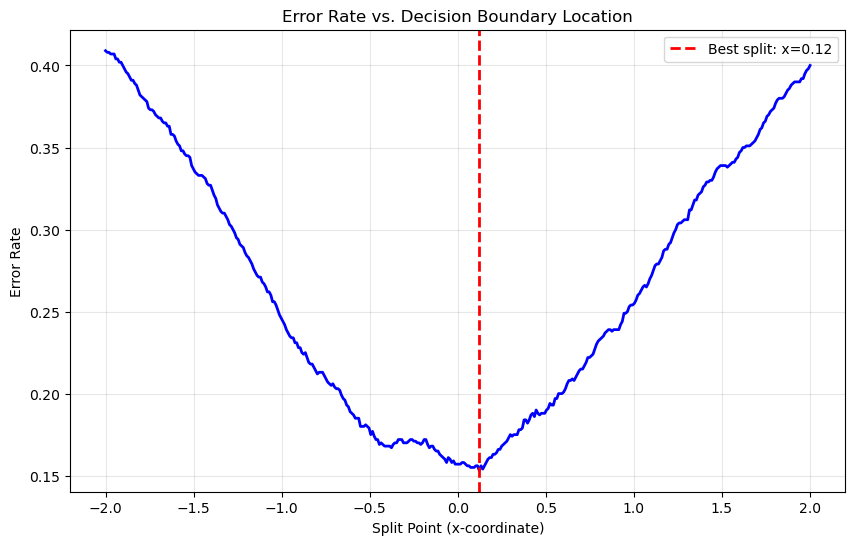

In [205]:
# %%# Plot error rates vs split points
plt.figure(figsize=(10, 6))
plt.plot(split_points, error_rates, 'b-', linewidth=2)
plt.axvline(x=best_split, color='red', linestyle='--', linewidth=2, 
           label=f'Best split: x={best_split:.2f}')
plt.xlabel('Split Point (x-coordinate)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Decision Boundary Location')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

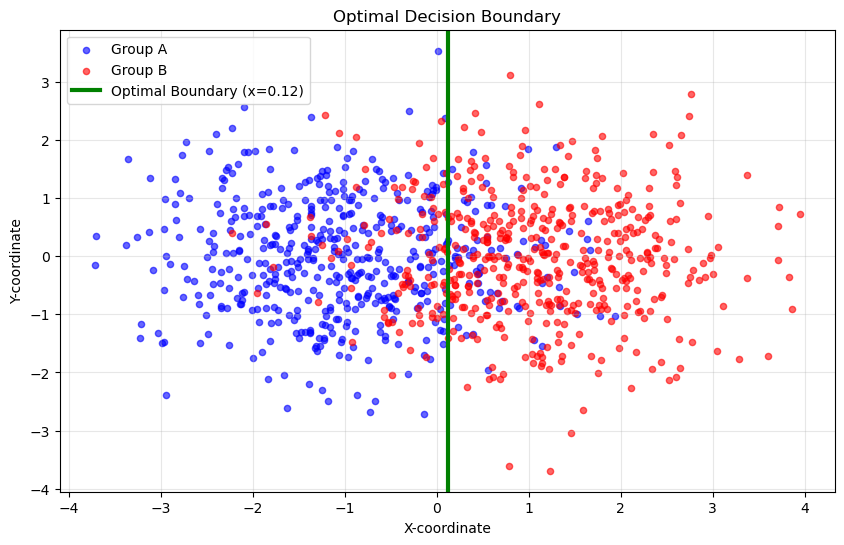

In [206]:
# Visualize the optimal boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_A_close[:, 0], X_A_close[:, 1], c='blue', alpha=0.6, label='Group A', s=20)
plt.scatter(X_B_close[:, 0], X_B_close[:, 1], c='red', alpha=0.6, label='Group B', s=20)
plt.axvline(x=best_split, color='green', linestyle='-', linewidth=3, 
           label=f'Optimal Boundary (x={best_split:.2f})')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Optimal Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Part 4: Different Variances

In [207]:
# TODO 4: Create distributions with different variances
# Group A: more concentrated, Group B: more spread out
ca = 1
cb = 0.5
cov_A = [[ca, 0], [0, ca]]  # Smaller variance
cov_B = [[cb, 0], [0, cb]]  # Larger variance

# YOUR CODE HERE:
# 1. Generate new data with these different covariances
# 2. Find the optimal split point
# 3. Compare error rates

X_A_diff = np.random.multivariate_normal(mean_A_close, cov_A, n_samples)
X_B_diff = np.random.multivariate_normal(mean_B_close, cov_B, n_samples)
split_points = np.linspace(-2, 2, 410)  # Test 41 different points

X_combined_diff = np.vstack([X_A_diff, X_B_diff])
y_combined_diff = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

# %%# Find optimal split for different variances
error_rates_diff = []
for split in split_points:
    predictions = (X_combined_diff[:, 0] > split).astype(int)
    errors = np.sum(predictions != y_combined_diff)
    error_rate = errors / len(y_combined_diff)
    error_rates_diff.append(error_rate)

best_idx_diff = np.argmin(error_rates_diff)
best_split_diff = split_points[best_idx_diff]
best_error_rate_diff = error_rates_diff[best_idx_diff]

In [208]:
best_split_diff

np.float64(0.07334963325183352)

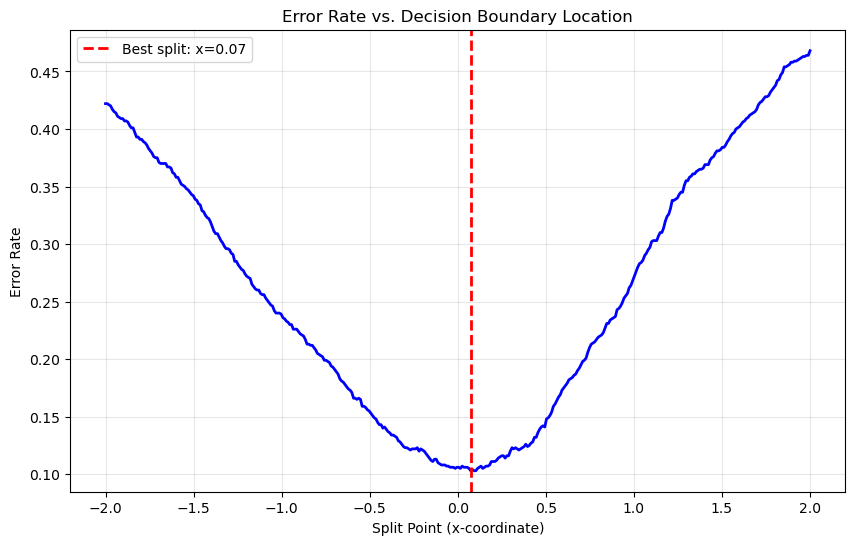

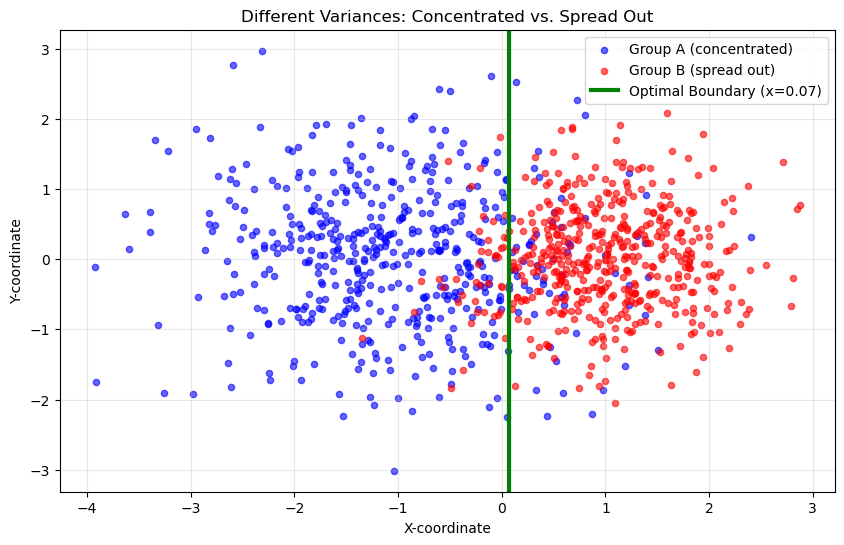

Optimal split with different variances: x = 0.07
Error rate: 0.103 (10.3%)
-0.3784048752090221


In [209]:
# %%# Plot error rates vs split points
plt.figure(figsize=(10, 6))
plt.plot(split_points, error_rates_diff, 'b-', linewidth=2)
plt.axvline(x=best_split_diff, color='red', linestyle='--', linewidth=2, 
           label=f'Best split: x={best_split_diff:.2f}')
plt.xlabel('Split Point (x-coordinate)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Decision Boundary Location')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_A_diff[:, 0], X_A_diff[:, 1], c='blue', alpha=0.6, label='Group A (concentrated)', s=20)
plt.scatter(X_B_diff[:, 0], X_B_diff[:, 1], c='red', alpha=0.6, label='Group B (spread out)', s=20)
plt.axvline(x=best_split_diff, color='green', linestyle='-', linewidth=3, 
           label=f'Optimal Boundary (x={best_split_diff:.2f})')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Different Variances: Concentrated vs. Spread Out')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Optimal split with different variances: x = {best_split_diff:.2f}")
print(f"Error rate: {best_error_rate_diff:.3f} ({best_error_rate_diff*100:.1f}%)")
print(1-np.sqrt(1.9))

## Part 5: Conclusions

What formula defines the optmal boundary between two distributions with equal variances and distinct means $\mu_1$ and $\mu_2$

What formula defines the optimal boundary when the means and variances are distinct? (This may be more of an educated guess...)

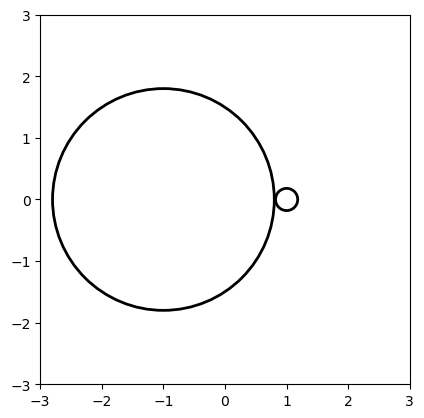

In [210]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

mu_1 = -1
mu_2 = 1
var_1 = 1
var_2 = 0.1

# Create circle: center=(x, y), radius=r
circle1 = patches.Circle((mu_1, 0), radius=1.8*var_1, fill=False, color='black', linewidth=2)
ax.add_patch(circle1)
circle2 = patches.Circle((mu_2, 0), radius=1.8*var_2, fill=False, color='black', linewidth=2)
ax.add_patch(circle2)

# Set equal aspect ratio so circle looks circular
ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.show()